In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from stingray import Lightcurve

datadir = "/Users/chris/Documents/QPP/SolarFlareGPs/data/daniela_goes_data/"
burstid = 1520110128 #"go1520110128.fits"
hdulist = fits.open(datadir+"go"+str(burstid)+'.fits')
hdulist.info()



Filename: /Users/chris/Documents/QPP/SolarFlareGPs/data/daniela_goes_data/go1520110128.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      25   ()      
  1  EDGES       BinTableHDU     18   1R x 1C   [4E]   
  2  FLUXES      BinTableHDU     32   1R x 2C   [42170D, 84340E]   
  3  STATUS      BinTableHDU     30   1R x 2C   [1E, 2E]   


In [2]:
hdulist[0].header

SIMPLE  =                    T /Written by IDL:  Tue Jun 26 09:25:02 2012       
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /File contains extensions                        
DATE    = '26/06/2012'         /file creation date                              
NUMEXT  =                    3 /no. of extensions in file                       
TELESCOP= 'GOES 15 '           /spacecraft                                      
INSTRUME= 'X-ray Detector'     /                                                
OBJECT  = 'Sun     '           /                                                
ORIGIN  = 'SDAC/GSFC'          /written by Solar DAC at GSFC                    
DATE-OBS= '28/01/2011'         /date of first obs.(DD/MM/YYYY)                  
TIME-OBS= '00:00:00.000'       /UT time of first obs.(HH:MM:SS.XXX)             
DATE-END= '28/01/2011'      

In [3]:
hdulist[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Tue Jun 26 09:25:02 2012       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   16 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    1 /Number of columns                               
EXTNAME = 'EDGES   '           /name of this binary extension                   
DATE    = '26/06/2012'         /file creation date                              
TELESCOP= 'GOES 15 '           /spacecraft                                      
INSTRUME= 'X-ray Detector'     /                                                
OBJECT  = 'Sun     '        

In [4]:
hdulist[1].data

FITS_rec([([[ 1. ,  8. ], [ 0.5,  4. ]],)],
         dtype=(numpy.record, [('EDGES', '>f4', (2, 2))]))

In [5]:
hdulist[2].header

XTENSION= 'BINTABLE'           /Written by IDL:  Tue Jun 26 09:25:02 2012       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =               674720 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    2 /Number of columns                               
MJDREF  =                43874 /MJD for reference file                          
TIMESYS = 'MJD     '           /The time system is MJD                          
TIMEUNIT= 's       '           /Unit for TSTART and TSTOP                       
TIMEZERO=                55589 /Time zero off-set                               
TSTART  =       -1.875000119

In [6]:
data = hdulist[2].data
time = data.field('TIME')
flux = np.sum(data.field('FLUX'), axis=2)[0]
time = time[0]-time[0,0]
print flux.shape

(42170,)


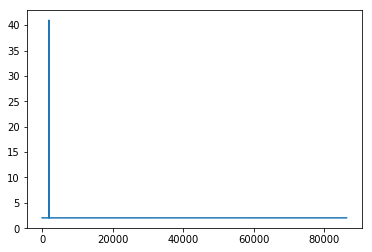

In [7]:
dt = np.diff(time)
plt.plot(time[:-1],dt)
plt.show()

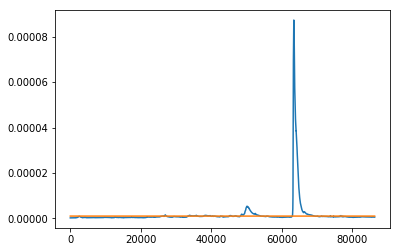

In [8]:
datadir = "/Users/chris/Documents/QPP/SolarFlareGPs/data/daniela_goes_data/"
burstid = 1520110213


def load_data(datadir, burstid):
    f = datadir+'go'+str(burstid)+'.fits'
    hdulist = fits.open(f)
    data = hdulist[2].data
    time = data.field('TIME')
    flux = np.sum(data.field('FLUX'), axis=2)[0]
    time = time[0]-time[0,0]
    return time, flux
   
time,flux = load_data(datadir,burstid)
plt.figure()
plt.plot(time,flux)
dt = np.diff(time)
plt.plot(time[:-1], dt * 5e-7)
plt.show()

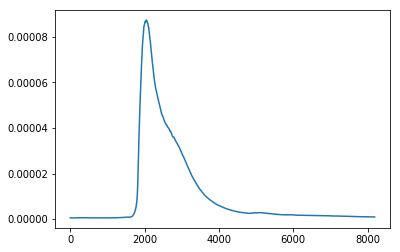

In [9]:
maxin = np.where(flux == np.max(flux))[0][0]
prestep = 1000
poststep = 3000
timeslice = time[maxin-prestep:maxin+poststep]
timeslice = timeslice-timeslice[0]
fluxslice = flux[maxin-prestep:maxin+poststep]
plt.plot(timeslice,fluxslice)
plt.show()

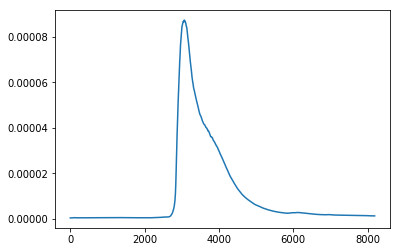

In [10]:
def trim_data(time, flux, pre=500, post=1500):
    maxin = np.where(flux[500:-500] == np.max(flux))[0][0]
    if maxin<pre:
        pre=maxin-1
    if len(time)-maxin>post:
        post = len(time)-maxin -1
    time_trim = time[maxin-prestep:maxin+poststep]
    if (len(time_trim)==0):
        print("No time at index: " + str(maxin))
    time_trim =time_trim-time_trim[0]
    flux_trim = flux[maxin-prestep:maxin+poststep]
    return time_trim, flux_trim

tt, ft = trim_data(time,flux)
plt.plot(tt,ft)
plt.show()

In [11]:
datadir = "/Users/chris/Documents/QPP/SolarFlareGPs/data/daniela_goes_data/"
'''
for burstid in range(1520110128,1520170715):
    try:
        time, flux = load_data(datadir,burstid)
    except(IOError):
        pass
    else:
        try:
            tt, ft = trim_data(time,flux)
        except(IndexError):
            pass
        plt.figure()
        plt.title("Burst " + str(burstid))
        plt.plot(tt,ft)

plt.show()

'''

'\nfor burstid in range(1520110128,1520170715):\n    try:\n        time, flux = load_data(datadir,burstid)\n    except(IOError):\n        pass\n    else:\n        try:\n            tt, ft = trim_data(time,flux)\n        except(IndexError):\n            pass\n        plt.figure()\n        plt.title("Burst " + str(burstid))\n        plt.plot(tt,ft)\n\nplt.show()\n\n'

Lightcurve 1:
Initializing...
Optimizing...
Initial log-likelihood: -49386.3082887


QPP_Funcs.py:18: RuntimeWarning: divide by zero encountered in divide
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))
QPP_Funcs.py:24: RuntimeWarning: divide by zero encountered in divide
  dtau1 = ((1/(np.exp(self.log_tau2) * np.log(lam))) - (1/t)) * self.get_value(t)
QPP_Funcs.py:24: RuntimeWarning: invalid value encountered in multiply
  dtau1 = ((1/(np.exp(self.log_tau2) * np.log(lam))) - (1/t)) * self.get_value(t)


Final log-likelihood: nan
Optimized log-parameters: [ 20.          -1.          -1.           0.           0.          12.02162647
   7.91203442   8.6051816 ]
Burning in...


QPP_Funcs.py:75: RuntimeWarning: divide by zero encountered in log
  return np.log(prob_a*prob_c * np.e)
QPP_Funcs.py:42: RuntimeWarning: divide by zero encountered in log
  return np.log(probA * probtau1 * probtau2 * np.e)
QPP_Funcs.py:17: RuntimeWarning: overflow encountered in exp
  lam = np.exp(np.sqrt(2*np.exp(self.log_tau1-self.log_tau2)))
QPP_Funcs.py:18: RuntimeWarning: invalid value encountered in multiply
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))
QPP_Funcs.py:60: RuntimeWarning: divide by zero encountered in log
  return np.log(prob_S0*prob_Q*prob_omega0 * np.e)
QPP_Funcs.py:18: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))


Sampling...
Done!
Plotting...
[ 23.89985711  -0.07718047  -5.62668583  -7.70019419   0.09963757
  15.24268083   9.74997473   6.14945241]


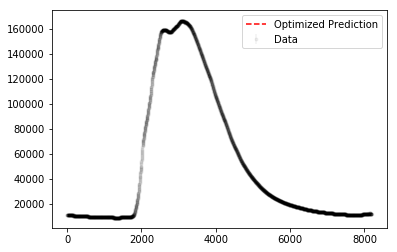

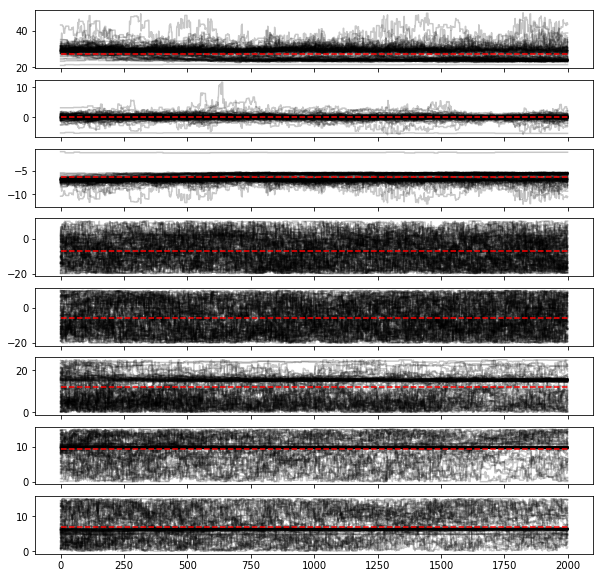

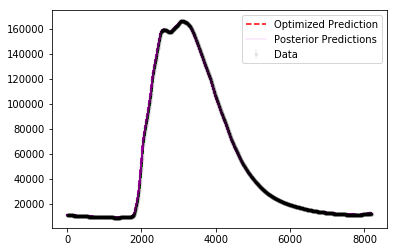

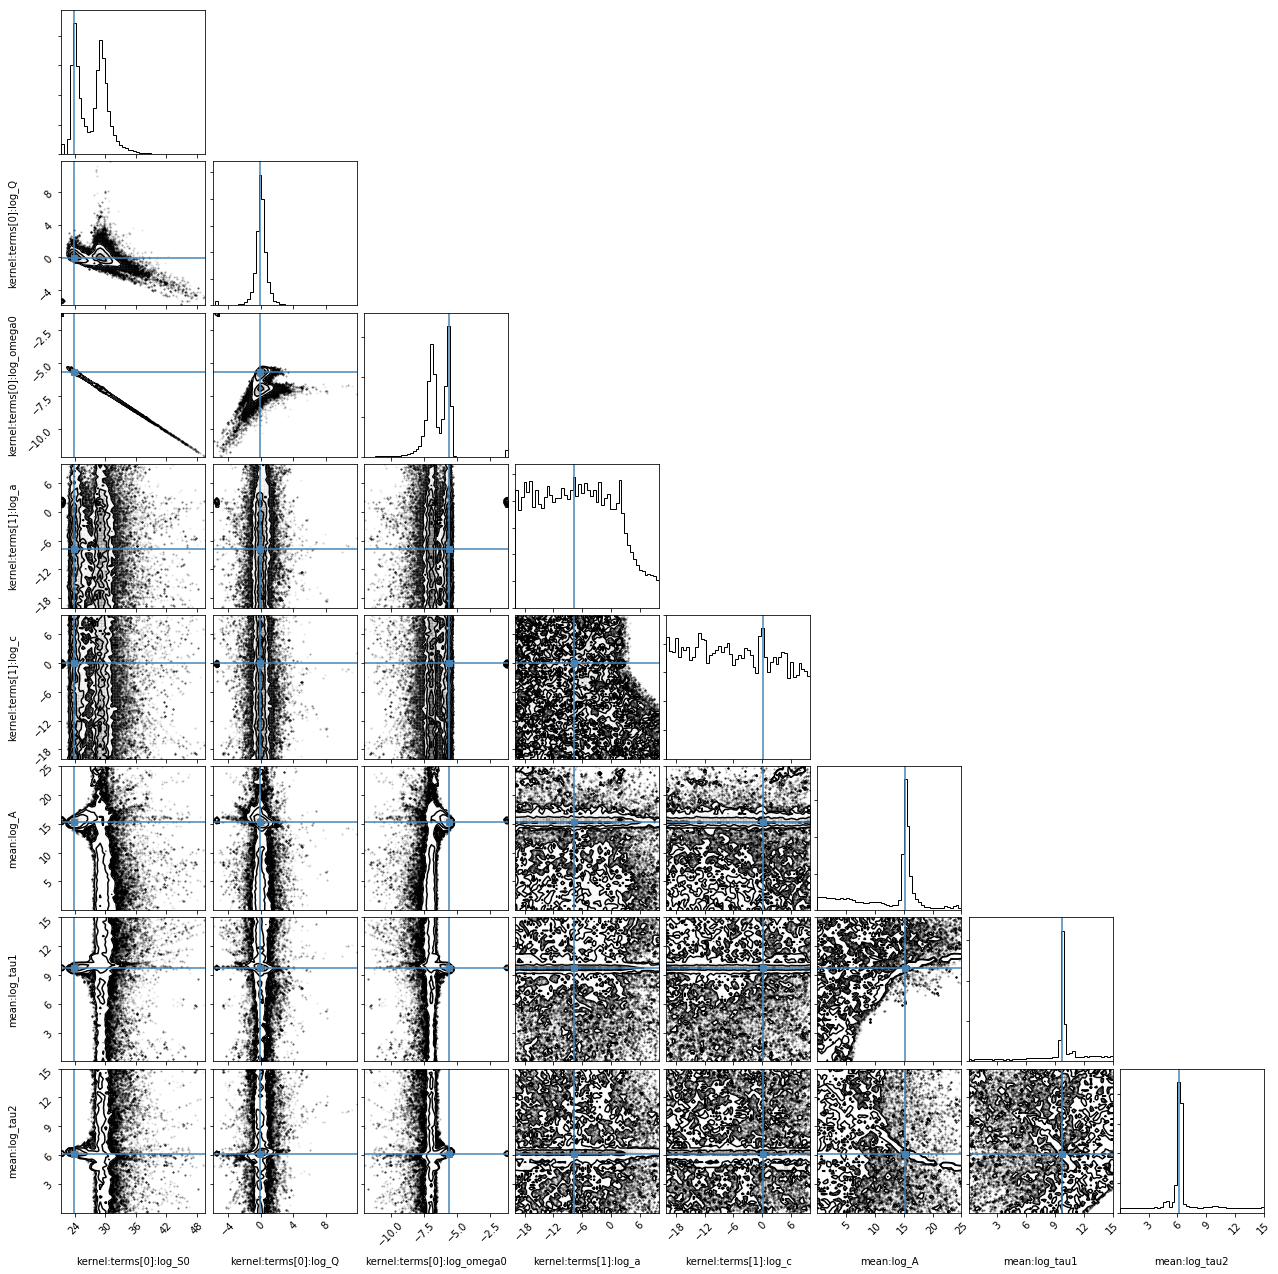

Lightcurve 2:
Initializing...
Optimizing...
Initial log-likelihood: -49535.5955775
Final log-likelihood: nan
Optimized log-parameters: [ 20.          -1.          -1.           0.           0.          11.82718849
   7.91204395   8.60519113]
Burning in...
Sampling...
Done!
Plotting...
[ 23.11913714   0.95160279  -4.77974899 -17.89867917 -19.6992494
  12.27368985   9.14606129   7.02834766]


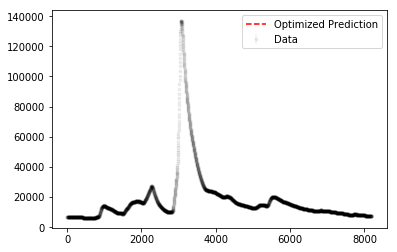

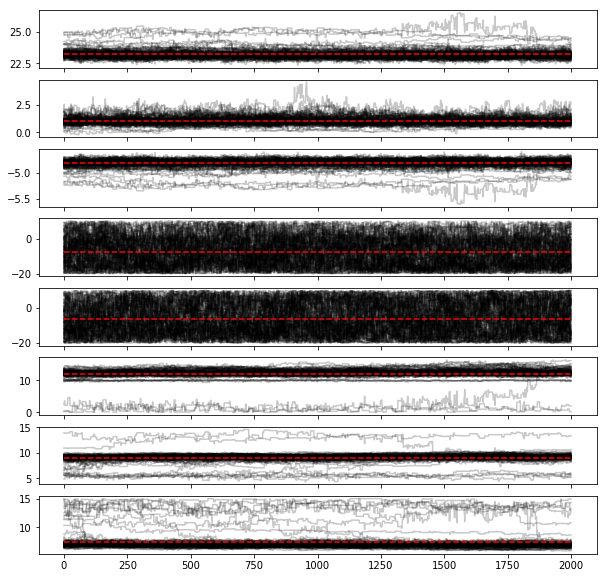

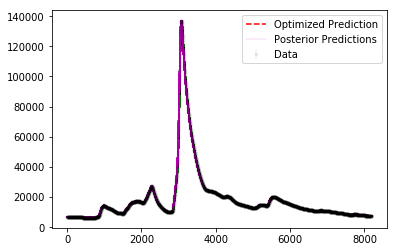

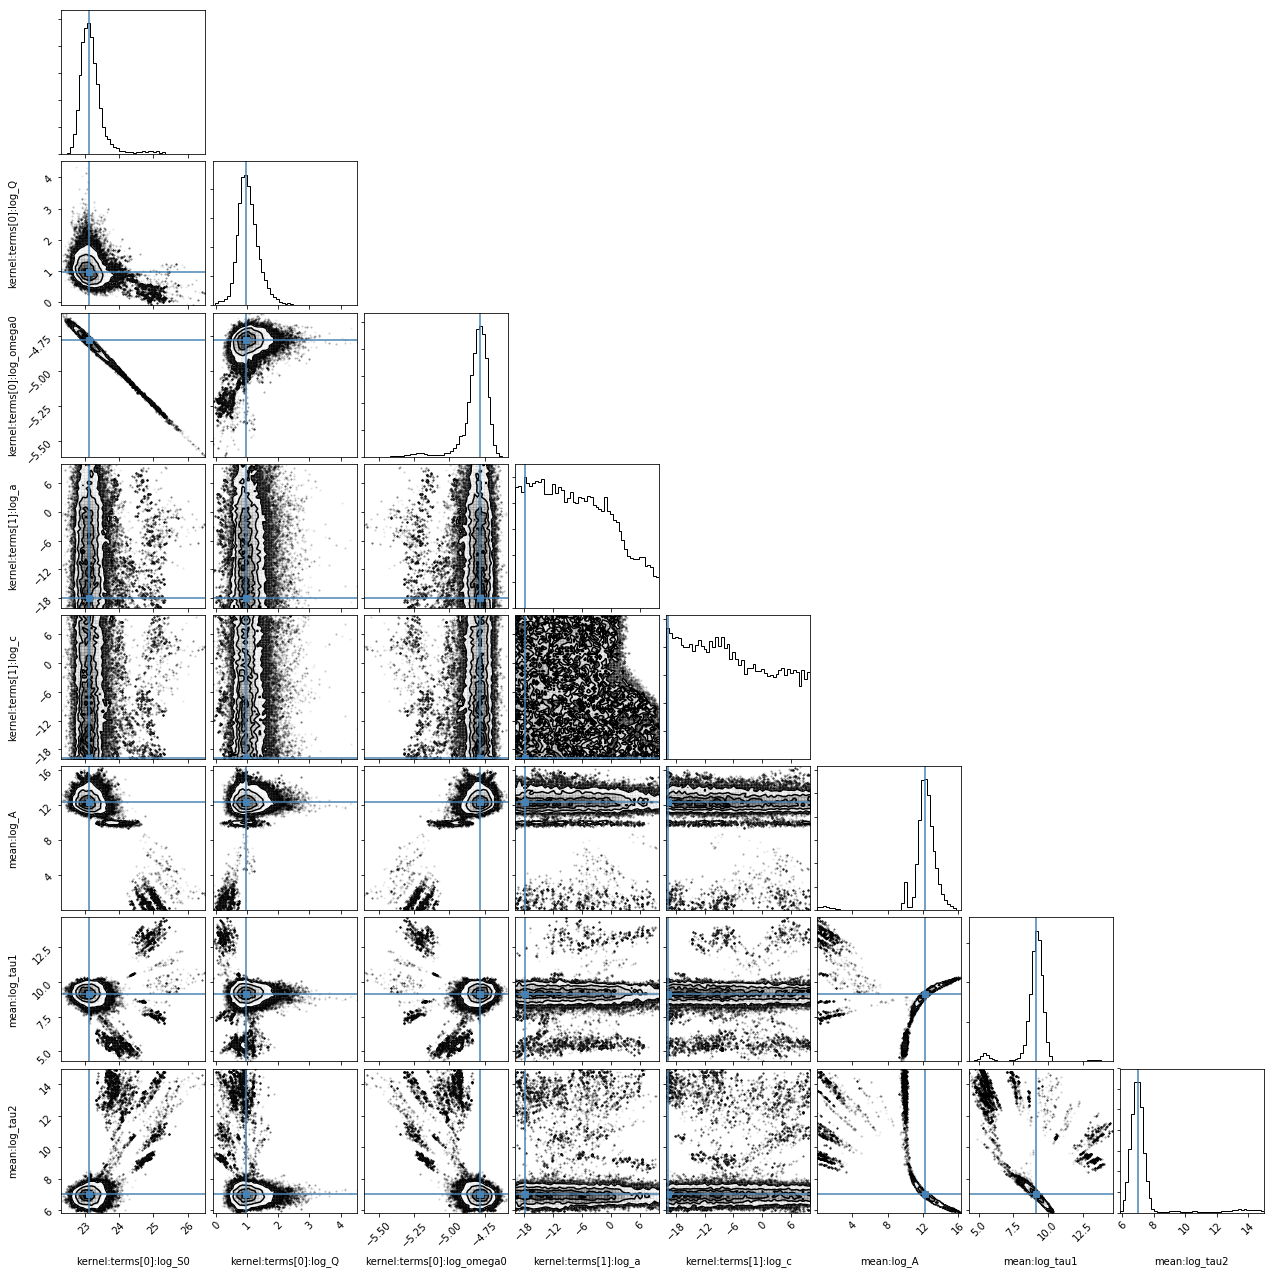

Lightcurve 3:
Initializing...
Optimizing...
Initial log-likelihood: -44705.5164153
Final log-likelihood: nan
Optimized log-parameters: [ 20.          -1.          -1.           0.           0.          11.93969536
   7.92298391   8.61613109]
Burning in...
Sampling...
Done!
Plotting...
[ 29.3657225   -1.12758509  -6.28977789 -13.69721286 -12.49870451
   2.2497116   10.04989856   6.44999897]


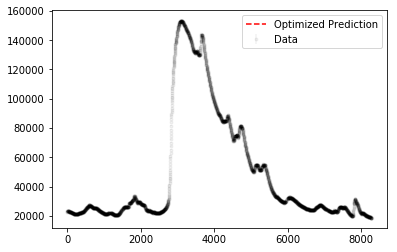

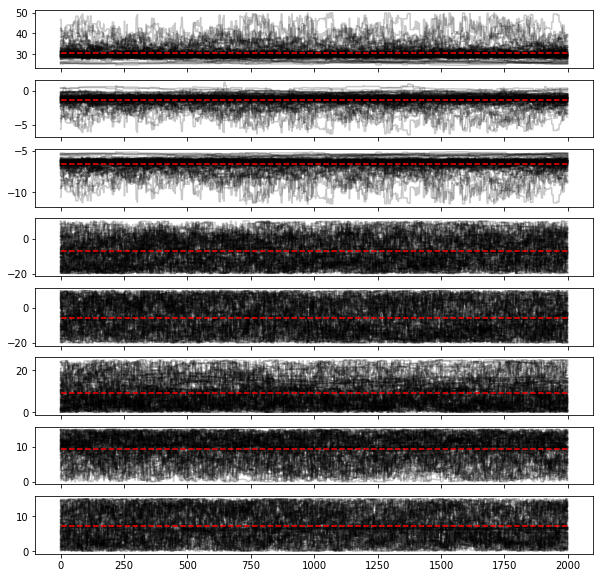

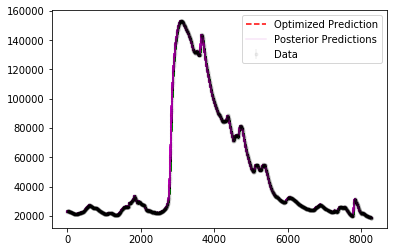

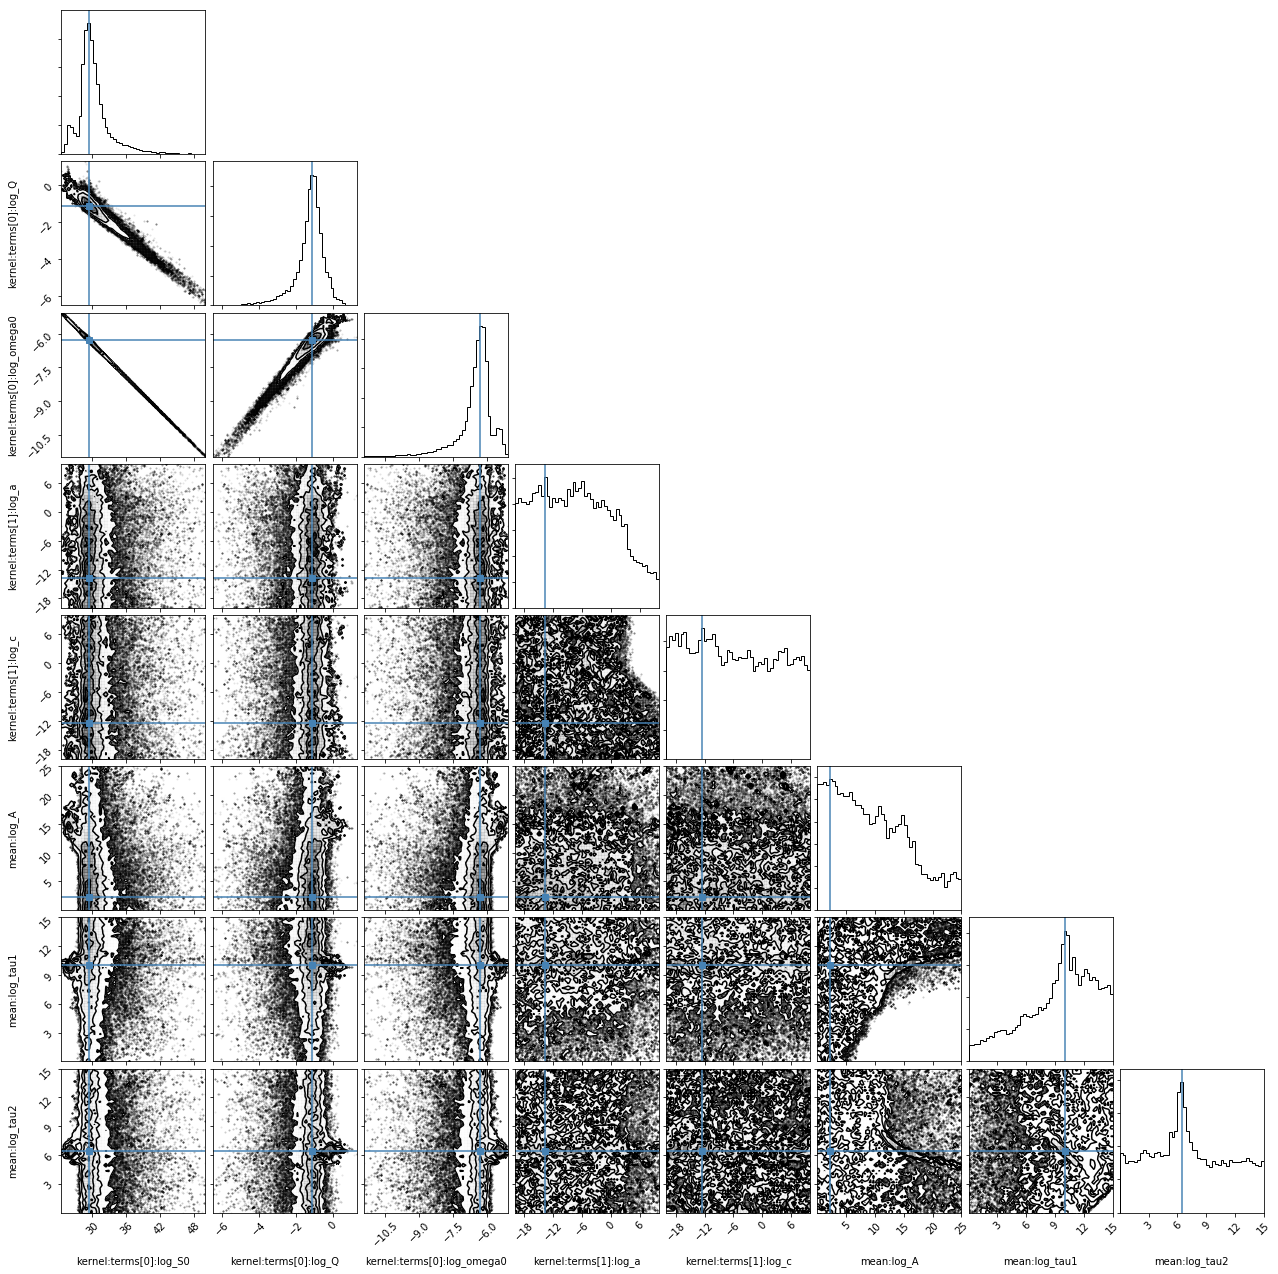

In [12]:
import scipy as sp
import celerite as ce
import emcee as mc
import QPP_Funcs as qpp
import corner
from celerite.modeling import Model
from scipy.optimize import minimize, curve_fit

i = 0
while(i!=3):
    burstid = np.random.randint(1520110128, high=1520170715)
    try:
        time, flux = load_data(datadir,burstid)
    except(IOError):
        pass
    else:
        i+=1
        tt,ft = trim_data(time,flux)
        ft = ft*1e10
        ft_err = np.sqrt(ft)
        plt.figure()
        print("Lightcurve " + str(i) +":")
        print("Initializing...")
        
        #initialization block
        A_guess, t1_guess, t2_guess = qpp.initguess(tt,ft)
        model = qpp.CTSModel_prior(log_A = np.log(A_guess), log_tau1 = np.log(t1_guess), log_tau2 = np.log(t2_guess))
        kernel1 = qpp.SHOTerm_Prior(log_S0 = 20, log_Q = -1, log_omega0 = -1) #write guesser for kernel parameters
        kernel2 = qpp.RealTerm_Prior(log_a=0., log_c=0.) #write guesser for kernel parameters
        kernel = kernel1 + kernel2
        gp = ce.GP(kernel, mean=model, fit_mean=True)
        gp.compute(tt, ft_err)
        print("Optimizing...")
        
        #optimization
        soln = qpp.optimize_gp(gp, ft)
        figopt = qpp.plot_gp(tt, ft, ft_err, gp, model, soln=soln)
    
        
        #sampling
        sampler = qpp.sample_gp(soln.x, ft, gp, burnin=1500, nsteps = 2000)
        chain = sampler.chain
        print("Plotting...")
        figsam = qpp.plot_chain(chain)
        
        figoptsam = qpp.plot_gp(tt, ft, ft_err, gp, model, soln=soln, chain=chain)
        
        figcorner, maxparams = qpp.plot_corner(chain, labels = gp.get_parameter_names())
        print maxparams
        plt.show()